In [12]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline

## Q3. What is the most features correlated to Sales price?

In [13]:
df = pd.read_csv(
    './../DataFiles/house-prices-advanced-regression-techniques/train.csv')

In [14]:
# Impute null values in LotFrontage column with the mean
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

# Replace null values in Alley column with a new category "No alley access"
df["Alley"].fillna("None", inplace=True)

# Impute null values in MasVnrType and MasVnrArea columns with the mode and median respectively
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

# Replace null values in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2 columns with a new category "No basement"
basement_cols = ["BsmtQual", "BsmtCond",
                 "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in basement_cols:
    df[col].fillna("None", inplace=True)

# Impute null value in Electrical column with the mode
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

# Replace null values in FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond columns with a new category "No fireplace" or "No garage"
fireplace_cols = ["FireplaceQu"]
garage_cols = ["GarageType", "GarageYrBlt",
               "GarageFinish", "GarageQual", "GarageCond"]
for col in fireplace_cols:
    df[col].fillna("None", inplace=True)
for col in garage_cols:
    df[col].fillna("None", inplace=True)

# Replace null values in PoolQC, Fence, and MiscFeature columns with a new category "No pool", "No fence", or "No miscellaneous feature"
df["PoolQC"].fillna("None", inplace=True)
df["Fence"].fillna("None", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [15]:
ordinal_cols = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                "HeatingQC", "CentralAir", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence"]
# Create a dictionary to map ordinal values to numerical values
ordinal_dict = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}

# Map ordinal values to numerical values
for col in ordinal_cols:
    df[col] = df[col].map(ordinal_dict)
    

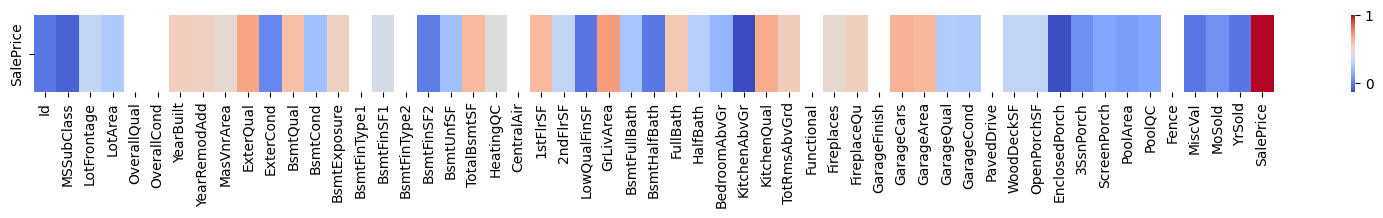

In [16]:
# Get all numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute pairwise correlation of all numerical columns
corr_matrix = numeric_cols.corr().round(2)

# Plot correlation  of sale price with all other numerical columns
plt.figure(figsize=(20, 1))
sns.heatmap(corr_matrix.loc[['SalePrice'], :], annot=False, cmap='coolwarm')
plt.show()


In [18]:
# Extract numerical colums in new dataframe
df_num = df.select_dtypes(include=['int64', 'float64'])

# Compute pairwise correlation of all columns
corr_matrix = df_num.corr()

# Get the correlation values for the 'SalePrice' column, sort in descending order, and get the top 3 most correlated columns
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)[1:6]

# Print the top 3 most correlated columns with SalePrice
print("The top 5 most correlated variables with SalePrice are:")
print(top_corr_features)


The top 5 most correlated variables with SalePrice are:
GrLivArea      0.708624
ExterQual      0.682639
KitchenQual    0.659600
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


Answer:
------------
When comparing means of the samples we found there may be a difference but when testing for statistical significance there is no significant difference in the mean SalePrice between properties with and without a pool.